# ANALIZA PODATKOV O HOTELIH

V tem delu bomo pridobljene podatke predelali, analizirali in jih primerjali.

In [65]:
# tabele bomo analizirali s pomočjo pandas, zato ga naložimo
import pandas as pd

# ker so razpredelnice velike, povemo, naj vedno izpiše le prvih 10 vrstic
pd.set_option('display.max_rows', 10)

# naložimo csv-je
amsterdam = pd.read_csv('amsterdam.csv')
split = pd.read_csv('split.csv')
lizbona = pd.read_csv('lizbona.csv') 

%matplotlib inline

Izpišimo tabele, da si bomo lažje predstavljali podatke, s akterimi imamo opravka.

In [51]:
amsterdam

,lokacija,ime,cena,ocena gostov,število zvezdic
0,Amsterdam,Orange Tulip Hotel,€ 328,"6,2",1
1,Amsterdam,Hotel Continental Amsterdam,€ 508,"5,1",1
2,Amsterdam,Amsterdam Downtown Hotel,€ 419,"6,9",2
3,Amsterdam,Weber Hotel,€ 547,"8,1",2
4,Amsterdam,Hotel Manofa,€ 333,"7,2",2
...,...,...,...,...,...
138,Amsterdam,Andaz Amsterdam Prinsengracht - a concept by H...,€ 1.007,"8,8",5
139,Amsterdam,Amsterdam Marriott Hotel,€ 872,"8,0",5
140,Amsterdam,Anantara Grand Hotel Krasnapolsky Amsterdam,€ 842,"8,7",5
141,Amsterdam,De L’Europe Amsterdam – The Leading Hotels of ...,€ 1.169,"8,9",5


In [38]:
split

,lokacija,ime,cena,ocena gostov,število zvezdic
0,Split,Hotel Alem,€ 119,"7,1",2
1,Split,Fontana Resort,€ 45,"7,0",2
2,Split,Arkada Hotel,€ 127,"6,9",2
3,Split,Hotel Zagreb,€ 114,"6,9",2
4,Split,Slavija Culture Heritage Hotel,€ 380,"8,7",3
...,...,...,...,...,...
156,Split,Damianii Luxury Boutique Hotel & Spa,€ 304,"8,8",5
157,Split,Bluesun hotel Berulia,€ 281,"8,9",5
158,Split,Bluesun Hotel Jadran,€ 294,"9,3",5
159,Split,Heritage Hotel Martinis Marchi,€ 418,"9,6",5


In [39]:
lizbona

,lokacija,ime,cena,ocena gostov,število zvezdic
0,Lizbona,Patria Hotel,€ 178,"8,1",1
1,Lizbona,Hotel Nova Cidade,€ 80,"7,9",1
2,Lizbona,Stay Hotel Lisboa Centro Saldanha,€ 131,"7,7",2
3,Lizbona,Moov Hotel Lisboa Oriente,€ 153,"8,6",2
4,Lizbona,Hotel Gat Rossio,€ 184,"8,5",2
...,...,...,...,...,...
192,Lizbona,VIP Grand Lisboa Hotel & Spa,€ 243,"7,7",5
193,Lizbona,Corpo Santo Lisbon Historical Hotel,€ 560,"9,4",5
194,Lizbona,Four Seasons Hotel Ritz Lisbon,€ 1.338,"8,9",5
195,Lizbona,Hotel Valverde Lisboa - Relais & Chateaux,€ 613,"8,8",5


### Povprečja

Kot pričakovano, nas najprej zanima katera lokacija ima v povprečju najdražje oz. najcenejše prenočitve in katera v poprečju najvišje oz. najnižje ocene.

In [53]:
# Da bomo lažje analizirati združimo vse tabele v eno
hoteli = pd.concat([amsterdam, split, lizbona], ignore_index=True)



# Cene hotelov so napisane kot nizi oblike '€ 123', oz. '€ 1.023', če so dražje kot 999€. Da bomo z njimi lahko računali povprečja, 
# jih moramo zato preurediti v samo številske znake in jih narediti v numerični tip.
hoteli['cena'] = hoteli['cena'].replace({'€': '', ' ': ''}, regex=True).str.replace('.', '', regex=False) # uporabimo regex=False, da ne bi python razmel pike kot 'katerikoli znak'
hoteli['cena'] = pd.to_numeric(hoteli['cena'])

# Enako moramo storiti z ocenami, ki so napisani kot nizi oblike '8,7'. Python za decimalko uporablja piko, zato moramo popraviti vejico in
# niz pretvoriti v numerični tip.
hoteli['ocena gostov'] = hoteli['ocena gostov'].replace({',': '.'}, regex=True)
hoteli['ocena gostov'] = pd.to_numeric(hoteli['ocena gostov'])



# Izračunamo povprečne cene in ocene gostov po lokacijah
povprecja = hoteli.groupby('lokacija').agg({'cena': 'mean', 'ocena gostov': 'mean'}).reset_index()
povprecja['cena'] = povprecja['cena'].round(2) # zaokrožimo na eno decimalko
povprecja['ocena gostov'] = povprecja['ocena gostov'].round(1) # zaokrožimo na eno decimalko

# Preimenujemo stolpce za boljšo preglednost
povprecja.rename(columns={'cena': 'povprečna cena', 'ocena gostov': 'povprečna ocena'}, inplace=True)

print(povprecja) # izpišemo tabelo s povprečji



# V primeru da je lokacij preveč, je uporabno da nam program izpiše katera ima najdražje/najcenejše prenočitve in najboljše/najslabše ocene
najdrazja_lokacija = povprecja.loc[povprecja['povprečna cena'].idxmax()]['lokacija']
najcenejsa_lokacija = povprecja.loc[povprecja['povprečna cena'].idxmin()]['lokacija']

najboljsa_lokacija = povprecja.loc[povprecja['povprečna ocena'].idxmax()]['lokacija']
najslabsa_lokacija = povprecja.loc[povprecja['povprečna ocena'].idxmin()]['lokacija']


print()
print(f"V povprečju ima najdražje prenočitve {najdrazja_lokacija} in najcenejše prenočitve {najcenejsa_lokacija}.")
print(f"V povprečju ima najboljše ocenjene hotele {najboljsa_lokacija} in najslabše ocenjene hotele {najslabsa_lokacija}.")

    lokacija  povprečna cena  povprečna ocena
0  Amsterdam          521.28              8.0
1    Lizbona          303.98              8.5
2      Split          216.42              8.7

V povprečju ima najdražje prenočitve Amsterdam in najcenejše prenočitve Split.
V povprečju ima najboljše ocenjene hotele Split in najslabše ocenjene hotele Amsterdam.


### Korelacija med cenami in ocenami gostov

Naslednje vprašanje, ki si ga postavimo, ko se odločamo o hotelih je verjetno "Ali se splača plačati višjo ceno?". En način s katerim lahko to preverimo je, ali imajo dražji hoteli res višje ocene. To bomo preverili s Pearsonovim korelacijskim koeficientom, katerega formula je: $$ \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n \sum x^2 - (\sum x)^2][n \sum y^2 - (\sum y)^2]}} $$ V našem primeru bosta x in y cene in ocene n pa število hotelov. Ta koeficient vrne vrednosti med -1 in 1. Vrednost blizu 1 pomeni močno pozitivno korelacijo, vrednost blizu -1 pomeni močno negativno korelacijo, medtem ko vrednost blizu 0 pomeni šibko ali nobeno linearno povezavo.


In [106]:
# Definirajmo funkcijo, ki bo preverila korelacijo na zgornji način.

def preveri_korelacijo(tabela):
    # Izluščimo cene in ocene gostov
    cene = tabela['cena'].replace({'€': '', ' ': ''}, regex=True).str.replace('.', '', regex=False)
    cene = pd.to_numeric(cene)
    ocene = tabela['ocena gostov'].replace({',': '.'}, regex=True)
    ocene = pd.to_numeric(ocene)

    # Izračunamo korelacijski koeficient
    n = len(cene)
    vsota_x = cene.sum()
    vsota_y = ocene.sum()
    vsota_x2 = (cene ** 2).sum()
    vsota_y2 = (ocene ** 2).sum()
    vsota_xy = (cene * ocene).sum()

    stevec = n * vsota_xy - vsota_x * vsota_y
    imenovalec = ((n * vsota_x2 - vsota_x ** 2) * (n * vsota_y2 - vsota_y ** 2)) ** 0.5

    korelacija = stevec / imenovalec

    # Določimo meje za korelacije in odčitamo, ali se splača plačati višjo ceno za boljšo izkušnjo
    if -1 <= korelacija <= -0.7:
        print(f"Korelacijski koeficient znaša {korelacija}, torej se ne splača odšteti več iz žepa.")
    elif -0.7 < korelacija <= -0.3:
        print(f"Korelacijski koeficient znaša {korelacija}, torej se v več primerih ne splača odšteti več iz žepa.")
    elif -0.3 < korelacija <= 0.3:
        print(f"Korelacijski koeficient znaša {korelacija}, torej ni nobene povezave med ceno in oceno.")
    elif 0.3 < korelacija <= 0.7:
        print(f"Korelacijski koeficient znaša {korelacija}, torej se v več primerih splača odšteti več iz žepa.")
    elif 0.7 < korelacija <= 1:
        print(f"Korelacijski koeficient znaša {korelacija}, torej se splača odšteti več iz žepa.")


In [107]:
# Ali se v Amsterdamu splača plačati več?

preveri_korelacijo(amsterdam)

Korelacijski koeficient znaša 0.39338700961688994, torej se v več primerih splača odšteti več iz žepa.


Povezavo med cenami in ocenami si lahko ogledamo tudi na grafu. Če imajo dražja prenočišča višje ocene bo moral graf biti naraščajoč.
Za risanje grafa potrebujemo matplotlib, zato ga naložimo.

In [69]:
import matplotlib.pyplot as mp

In [111]:
# Definirajmo funkcijo, ki nam bo izrisala graf.

def graf_korelacije(tabela):
    podtabela1 = tabela[['cena', 'ocena gostov']] # vzamemo samo tista stolpca, ki ju rabimo in ju uredimo

    podtabela1['cena'] = podtabela1['cena'].replace({'€': '', ' ': ''}, regex=True).str.replace('.', '', regex=False)
    podtabela1['cena'] = pd.to_numeric(podtabela1['cena'])
    podtabela1['ocena gostov'] = podtabela1['ocena gostov'].replace({',': '.'}, regex=True)
    podtabela1['ocena gostov'] = pd.to_numeric(podtabela1['ocena gostov'])

    podtabela1 = podtabela1.sort_values('cena') # uredimo tabelo po naraščajočih cenah
    print(podtabela1) # izpišemo jo za boljšo kontrolo
    
    # Narišimo graf z uporabo plot.

    mp.plot(podtabela1['cena'], podtabela1['ocena gostov']) # povemo kaj naj bo abcisa in kaj orinata

    # Dodamo naslov in ime grafa in imena osi
    mp.title('Odnos med ceno in oceno hotelov')
    mp.xlabel('Cena (€)')
    mp.ylabel('Ocena')

    # Prikaz grafa
    mp.grid(True)
    mp.show()

     cena  ocena gostov
20    139           7.0
18    168           7.6
19    184           7.8
42    265           6.2
44    273           7.7
..    ...           ...
138  1007           8.8
134  1038           8.9
141  1169           8.9
122  1204           8.7
130  1811           8.4

[143 rows x 2 columns]


C:\Users\38669\AppData\Local\Temp\ipykernel_30160\409997771.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podtabela1['cena'] = podtabela1['cena'].replace({'€': '', ' ': ''}, regex=True).str.replace('.', '', regex=False)
C:\Users\38669\AppData\Local\Temp\ipykernel_30160\409997771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podtabela1['cena'] = pd.to_numeric(podtabela1['cena'])
C:\Users\38669\AppData\Local\Temp\ipykernel_30160\409997771.py:8: SettingWithCopyWarning: 
A value is trying to be set 

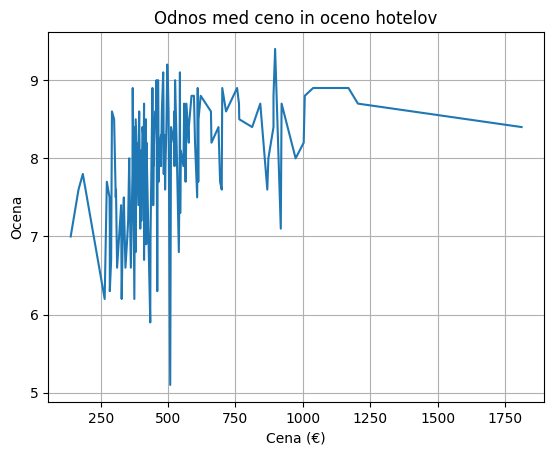

In [110]:
graf_korelacije(amsterdam)

Postopek ponovimo za Split in Lizbono.

Korelacijski koeficient znaša 0.3714150299187249, torej se v več primerih splača odšteti več iz žepa.
     cena  ocena gostov
1      45           7.0
37     64           6.8
38     65           9.5
28     68           8.2
18     72           8.7
..    ...           ...
124   535           9.0
106   550           9.3
104   560           9.2
151   604           8.6
160  1063           9.4

[161 rows x 2 columns]


C:\Users\38669\AppData\Local\Temp\ipykernel_30160\13597592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podtabela1['cena'] = podtabela1['cena'].replace({'€': '', ' ': ''}, regex=True).str.replace('.', '', regex=False)
C:\Users\38669\AppData\Local\Temp\ipykernel_30160\13597592.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podtabela1['cena'] = pd.to_numeric(podtabela1['cena'])
C:\Users\38669\AppData\Local\Temp\ipykernel_30160\13597592.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

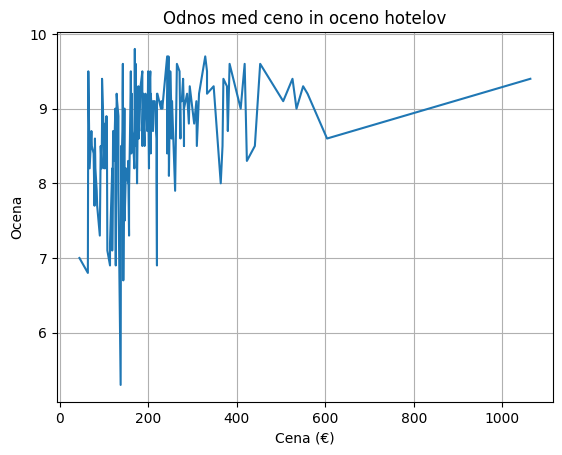

In [116]:
# Ali se v Splitu splača plačati več?

preveri_korelacijo(split)
graf_korelacije(split)

Korelacijski koeficient znaša 0.5142611562700826, torej se v več primerih splača odšteti več iz žepa.
     cena  ocena gostov
17     70           8.4
1      80           7.9
18     87           7.6
22     90           7.1
16     96           7.8
..    ...           ...
196   988           9.1
186   998           9.2
188  1083           9.4
194  1338           8.9
190  1508           9.3

[197 rows x 2 columns]


C:\Users\38669\AppData\Local\Temp\ipykernel_30160\13597592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podtabela1['cena'] = podtabela1['cena'].replace({'€': '', ' ': ''}, regex=True).str.replace('.', '', regex=False)
C:\Users\38669\AppData\Local\Temp\ipykernel_30160\13597592.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podtabela1['cena'] = pd.to_numeric(podtabela1['cena'])
C:\Users\38669\AppData\Local\Temp\ipykernel_30160\13597592.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

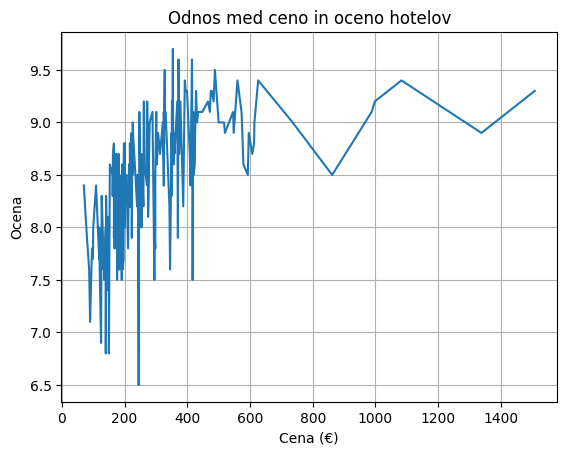

In [117]:
# Ali se v Lizboni splača plačati več?

preveri_korelacijo(lizbona)
graf_korelacije(lizbona)